<a href="https://colab.research.google.com/github/ShahdAmmar/ml_projects/blob/main/supervised/trilobite_fossil_age_prediction/trilobite_fossil_age_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# Data Loading

In [ ]:
data_path = '/content/drive/My Drive/ml_datasets/trilobite.csv'

In [ ]:
df = pd.read_csv(data_path)

In [ ]:
df.head()

,scientific_name,order,order_num,family,family_num,genus,genus_num,species,early_interval,late_interval,...,lithology,environment,assembly_composition,preservation_mode,collection_name,collection_type,life_habit,vision,diet,time_period
0,Australosutura llanoensis,Proetida,21062,Brachymetopidae,56732,Australosutura,21084,llanoensis,Ivorian,NaN,...,limestone,basinal (carbonate),macrofossils,body,"USNM 9047, Jack Sloan Ranch",taxonomic,low-level epifaunal,well-developed,deposit feeder,Carboniferous
1,Phillibole planucauda,Proetida,21062,Phillipsiidae,85866,Archegonus (Phillibole),21075,planucauda,Ivorian,NaN,...,limestone,basinal (carbonate),macrofossils,body,"USNM 9047, Jack Sloan Ranch",taxonomic,low-level epifaunal,well-developed,deposit feeder,Carboniferous
2,Thigriffides roundyi,Proetida,21062,Phillipsiidae,85866,Thigriffides,21387,roundyi,Ivorian,NaN,...,limestone,basinal (carbonate),macrofossils,body,"USNM 9047, Jack Sloan Ranch",taxonomic,low-level epifaunal,well-developed,deposit feeder,Carboniferous
3,Pudoproetus chappelensis,Proetida,21062,Proetidae,56726,Pudoproetus,177081,chappelensis,Ivorian,NaN,...,carbonate,marine indet.,NaN,body,USNM 9048,taxonomic,low-level epifaunal,well-developed,deposit feeder,Carboniferous
4,Pudoproetus chappelensis,Proetida,21062,Proetidae,56726,Pudoproetus,177081,chappelensis,Ivorian,NaN,...,carbonate,marine indet.,NaN,body,USNM 9044,taxonomic,low-level epifaunal,well-developed,deposit feeder,Carboniferous


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29039 entries, 0 to 29038
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   scientific_name       29039 non-null  object 
 1   order                 29039 non-null  object 
 2   order_num             29039 non-null  object 
 3   family                29039 non-null  object 
 4   family_num            29039 non-null  object 
 5   genus                 29039 non-null  object 
 6   genus_num             29039 non-null  int64  
 7   species               29039 non-null  object 
 8   early_interval        29039 non-null  object 
 9   late_interval         2556 non-null   object 
 10  max_age_mya           29039 non-null  float64
 11  min_age_mya           29039 non-null  float64
 12  country               28997 non-null  object 
 13  state                 22914 non-null  object 
 14  longitude             29039 non-null  float64
 15  latitude           

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# EDA

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23231 entries, 24761 to 23654
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   scientific_name       23231 non-null  object 
 1   order                 23231 non-null  object 
 2   order_num             23231 non-null  object 
 3   family                23231 non-null  object 
 4   family_num            23231 non-null  object 
 5   genus                 23231 non-null  object 
 6   genus_num             23231 non-null  int64  
 7   species               23231 non-null  object 
 8   early_interval        23231 non-null  object 
 9   late_interval         2059 non-null   object 
 10  max_age_mya           23231 non-null  float64
 11  min_age_mya           23231 non-null  float64
 12  country               23195 non-null  object 
 13  state                 18329 non-null  object 
 14  longitude             23231 non-null  float64
 15  latitude            

## Missing Values

In [ ]:
train_df.isnull().sum().sort_values(ascending=False)

,0
late_interval,21172
state,4902
stratigraphy_scale,4602
latlng_basis,2888
assembly_composition,2564
time_period,2383
preservation_mode,1997
vision,1756
formation,1528
environment,437


Text(0.5, 1.0, 'Missing Values Heatmap')

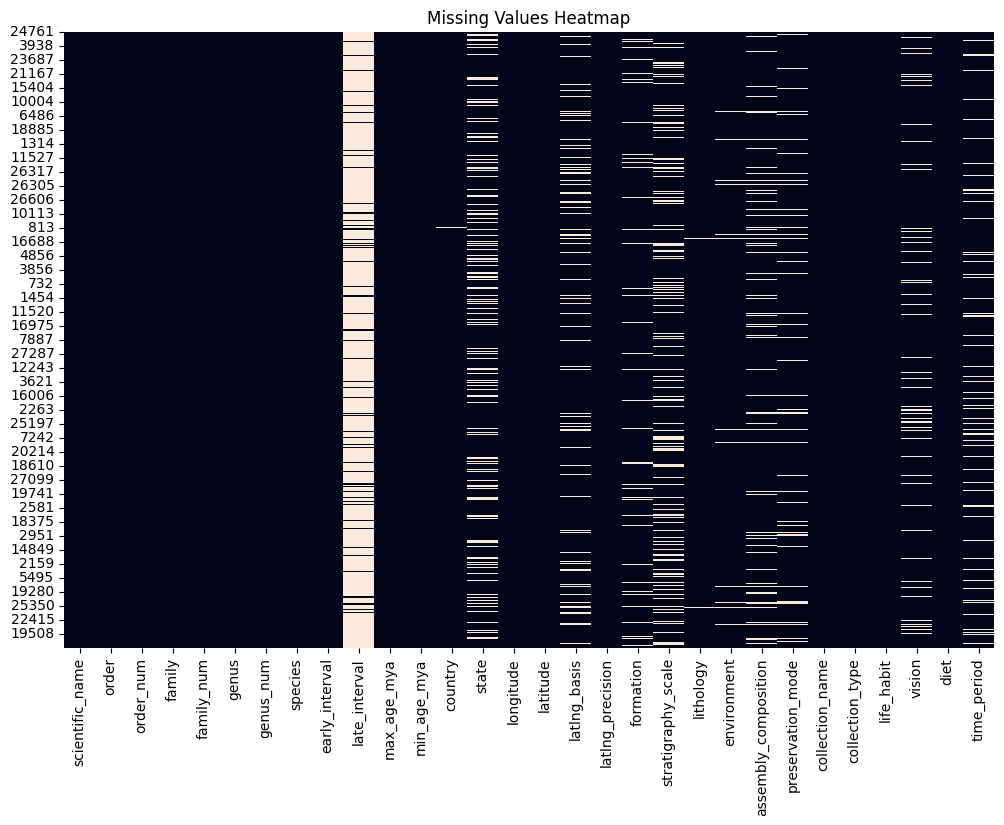

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")

## Numerical Columns Exploration

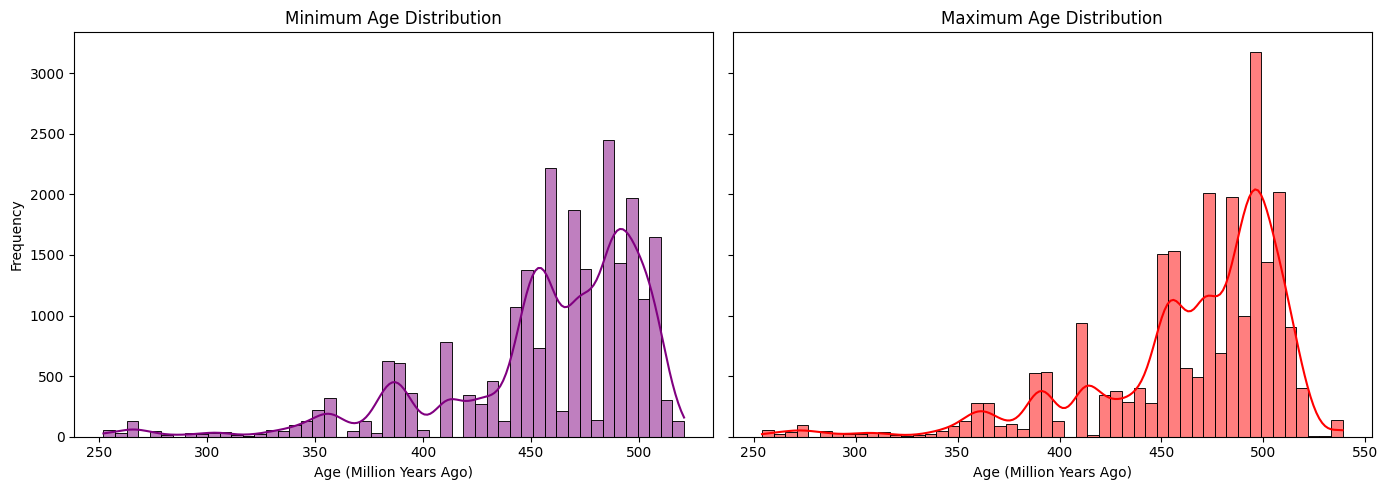

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

sns.histplot(train_df['min_age_mya'], ax=axes[0], color='purple', kde=True, bins=50)
axes[0].set_title("Minimum Age Distribution")

sns.histplot(train_df['max_age_mya'], ax=axes[1], color='red', kde=True, bins=50)
axes[1].set_title("Maximum Age Distribution")

for ax in axes:
    ax.set_xlabel("Age (Million Years Ago)")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

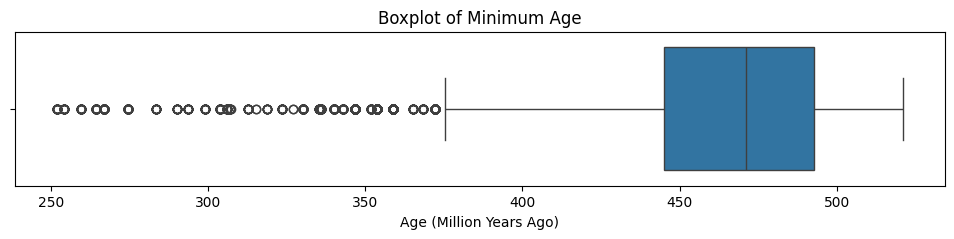

In [ ]:
plt.figure(figsize=(12, 2))
sns.boxplot(x=train_df['min_age_mya'])
plt.title("Boxplot of Minimum Age")
plt.xlabel("Age (Million Years Ago)")
plt.show()

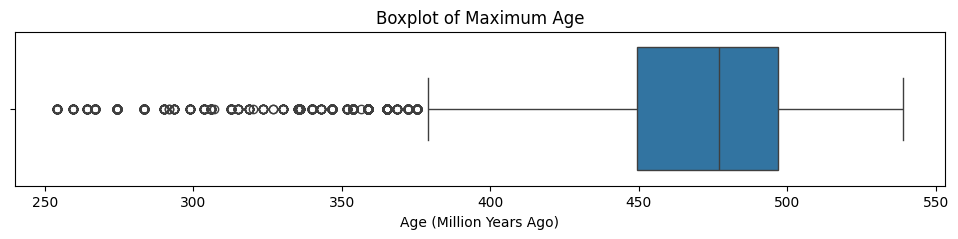

In [ ]:
plt.figure(figsize=(12, 2))
sns.boxplot(x=train_df['max_age_mya'])
plt.title("Boxplot of Maximum Age")
plt.xlabel("Age (Million Years Ago)")
plt.show()

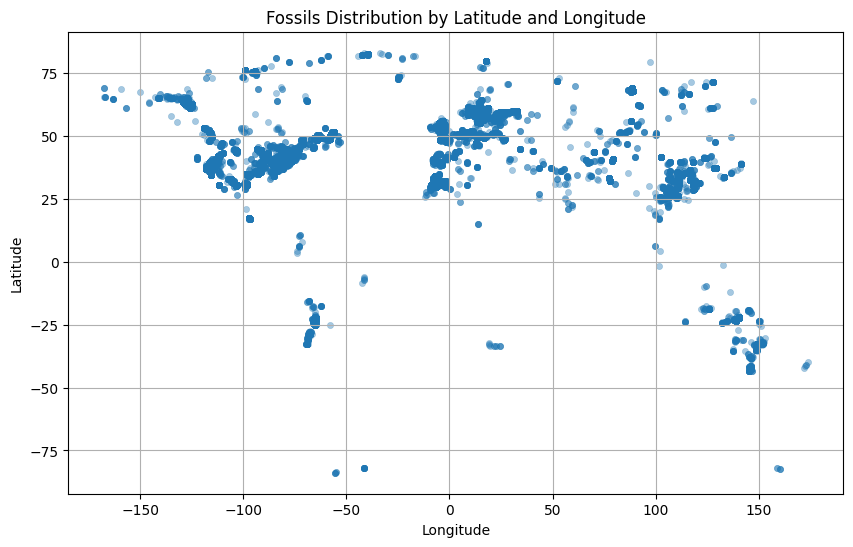

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='longitude', y='latitude', alpha=0.4, s=20, edgecolor=None)
plt.title("Fossils Distribution by Latitude and Longitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

## Categorical Columns Exploration

In [ ]:
categorical_cols = train_df.select_dtypes(include='object').columns

In [ ]:
train_df[categorical_cols].nunique().sort_values()

,0
vision,3
stratigraphy_scale,5
life_habit,5
latlng_basis,5
diet,5
collection_type,6
time_period,6
assembly_composition,7
latlng_precision,11
order,12


/tmp/ipython-input-124-713908065.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, y='order', palette='viridis')


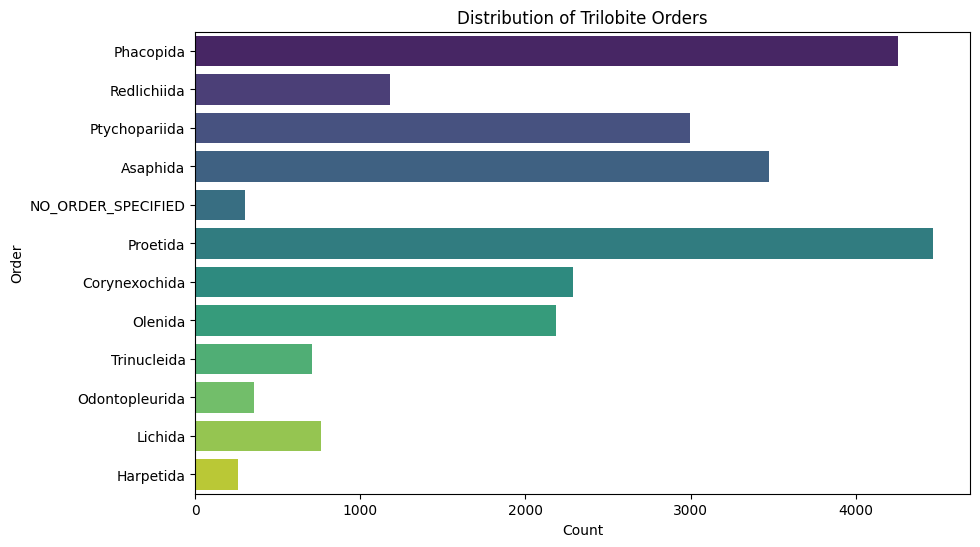

In [ ]:
order_counts = train_df['order'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, y='order', palette='viridis')
plt.title("Distribution of Trilobite Orders")
plt.xlabel("Count")
plt.ylabel("Order")
plt.show()

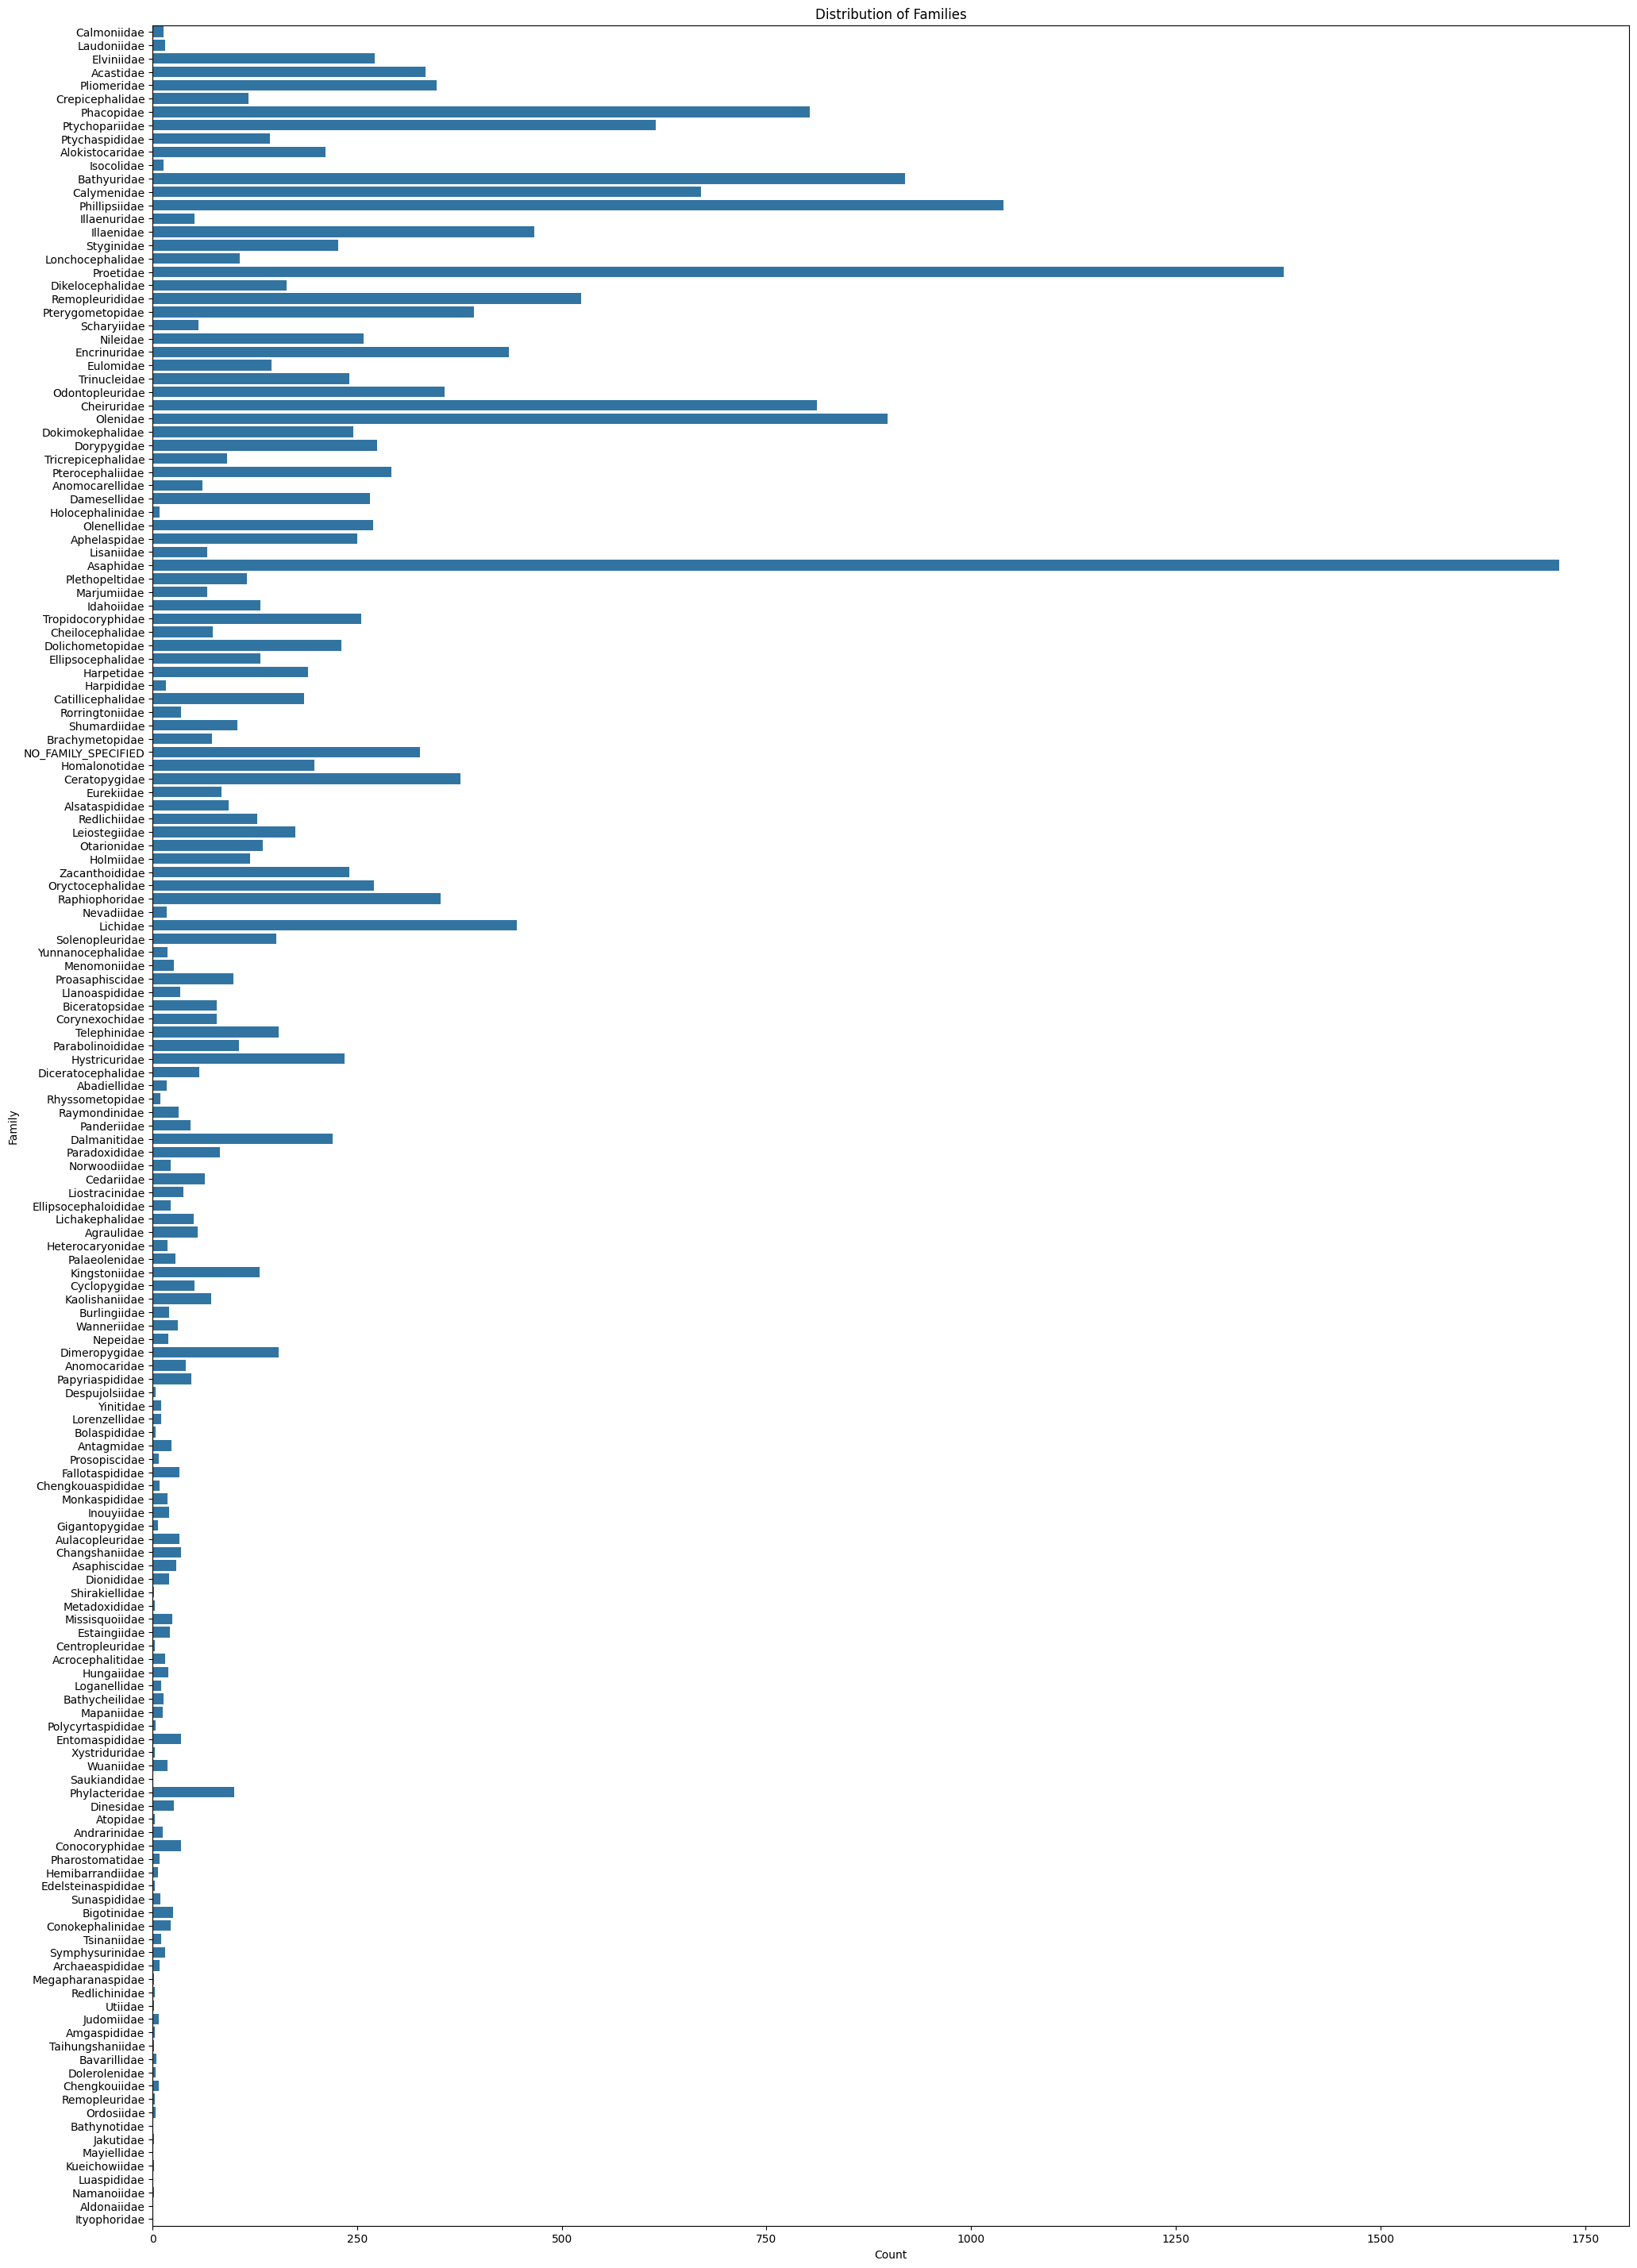

In [ ]:
plt.figure(figsize=(24, 36))
sns.countplot(data=train_df, y='family')
plt.title("Distribution of Families")
plt.xlabel("Count")
plt.ylabel("Family")
plt.show()

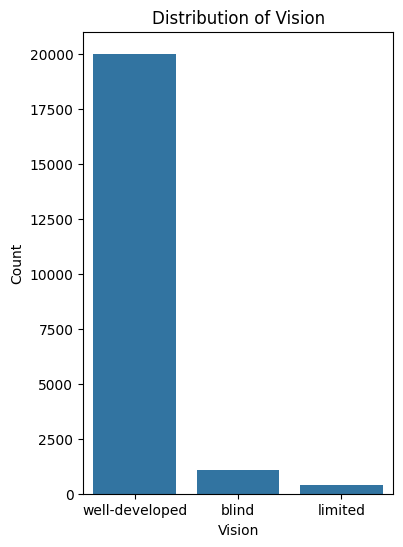

In [ ]:
plt.figure(figsize=(4, 6))
sns.countplot(data=train_df, x='vision')
plt.title("Distribution of Vision Types")
plt.xlabel("Vision")
plt.ylabel("Count")
plt.show()

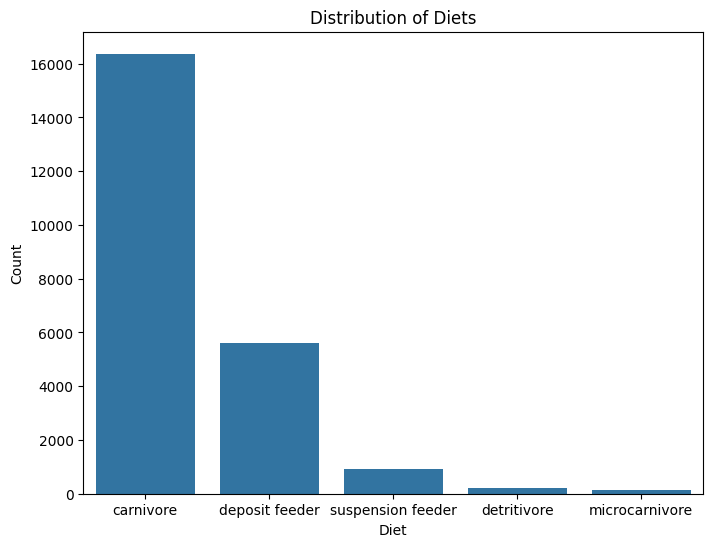

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='diet')
plt.title("Distribution of Diets")
plt.xlabel("Diet")
plt.ylabel("Count")
plt.show()

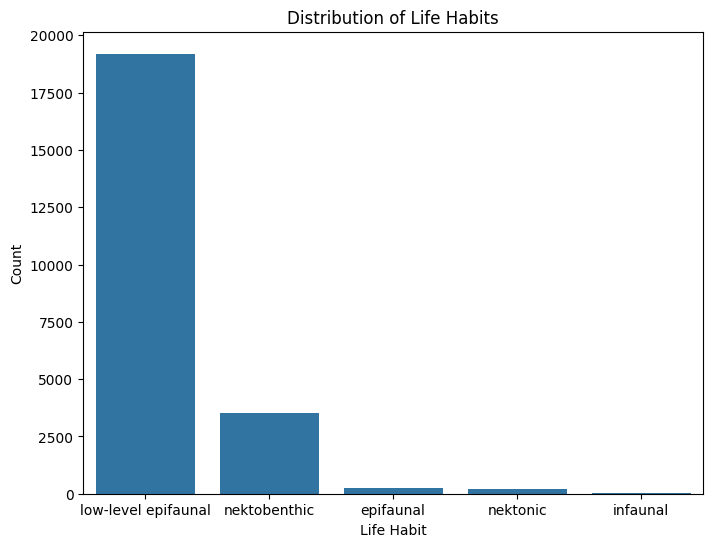

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='life_habit')
plt.title("Distribution of Life Habits")
plt.xlabel("Life Habit")
plt.ylabel("Count")
plt.show()

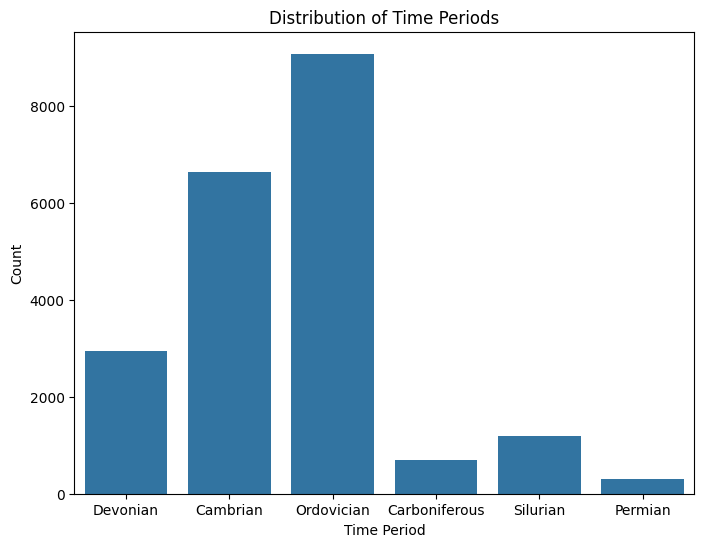

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='time_period')
plt.title("Distribution of Time Periods")
plt.xlabel("Time Period")
plt.ylabel("Count")
plt.show()

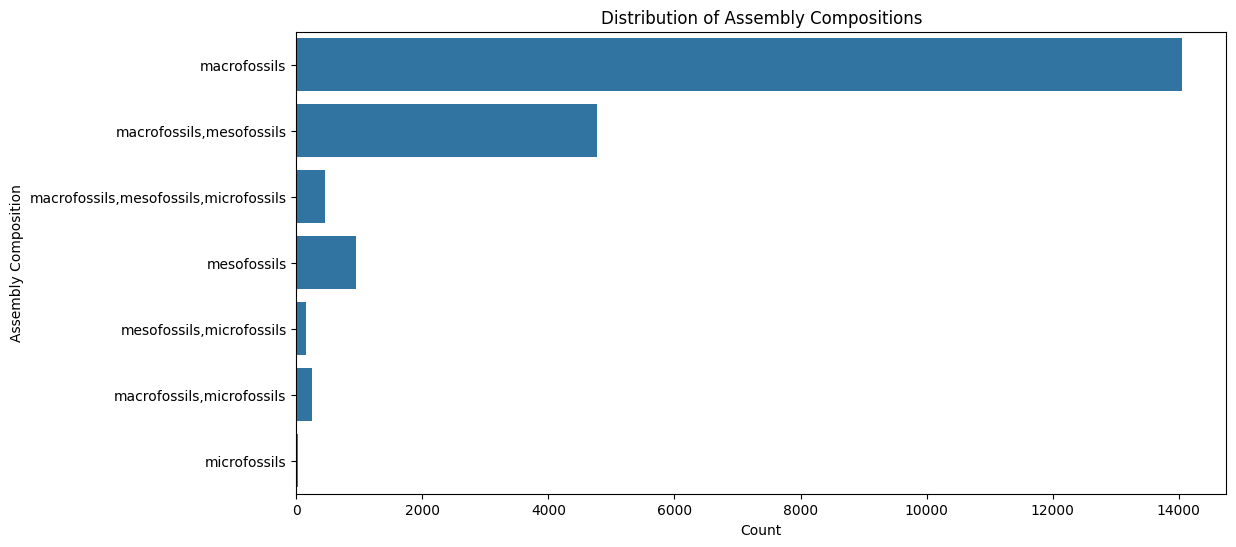

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, y='assembly_composition')
plt.title("Distribution of Assembly Compositions")
plt.xlabel("Count")
plt.ylabel("Assembly Composition")
plt.show()

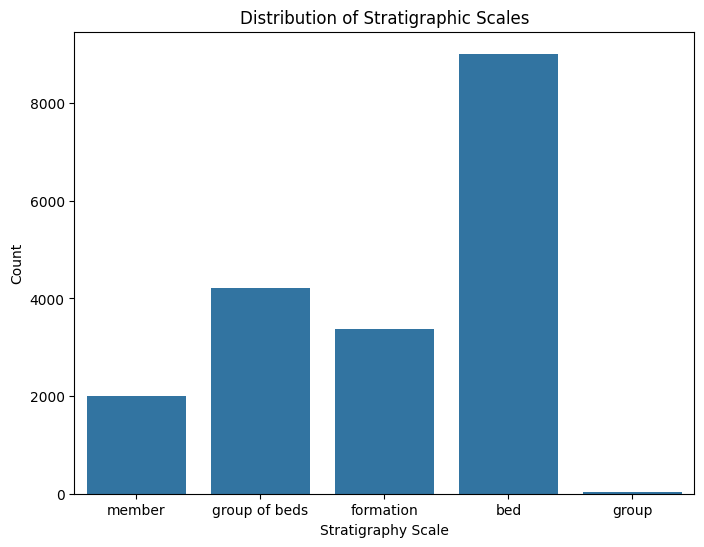

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='stratigraphy_scale')
plt.title("Distribution of Stratigraphic Scales")
plt.xlabel("Stratigraphy Scale")
plt.ylabel("Count")
plt.show()

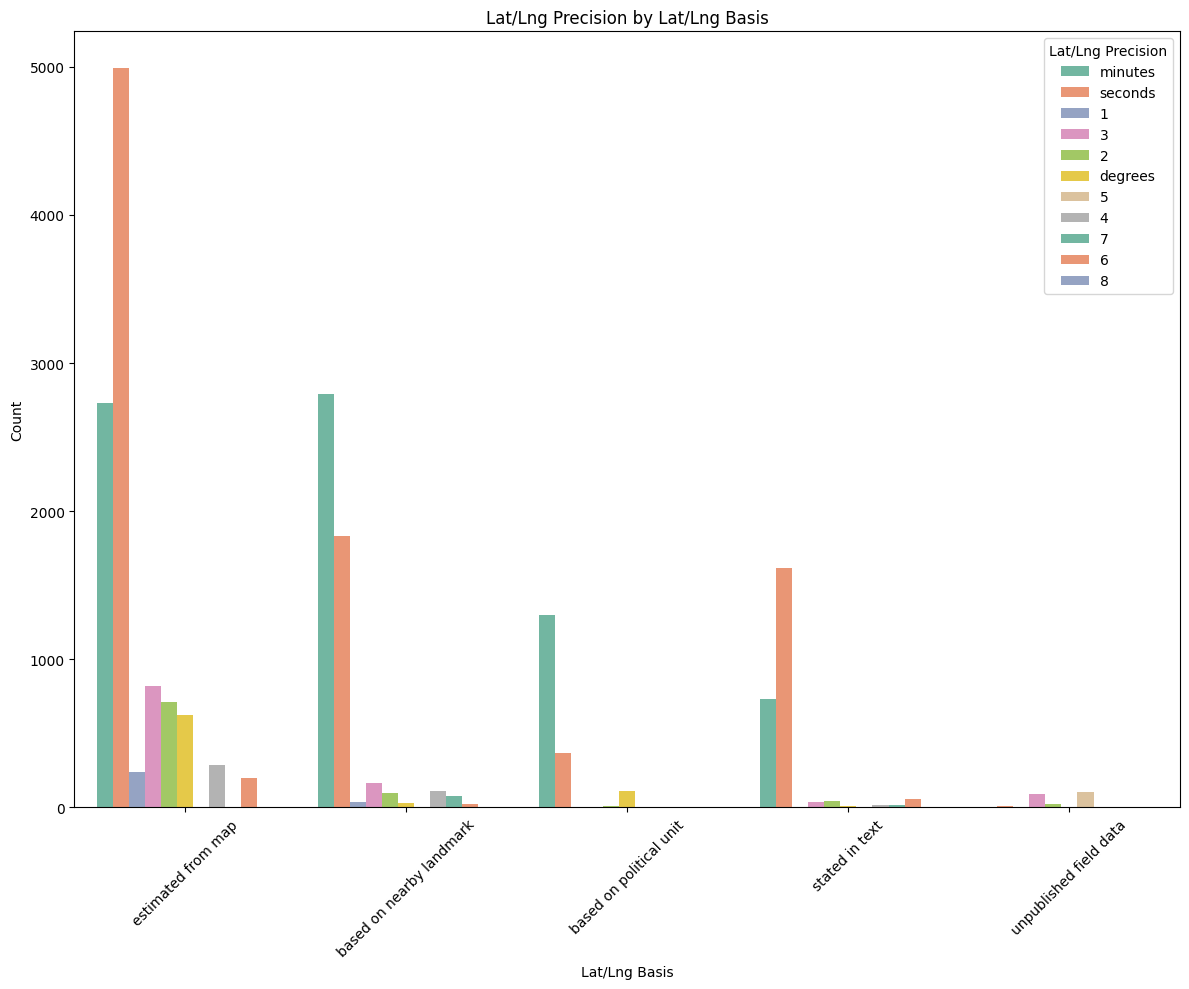

In [ ]:
plt.figure(figsize=(12, 10))
sns.countplot(data=train_df, x='latlng_basis', hue='latlng_precision', palette='Set2')
plt.title("Lat/Lng Precision by Lat/Lng Basis")
plt.xlabel("Lat/Lng Basis")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Lat/Lng Precision")
plt.tight_layout()
plt.show()


## Correlations

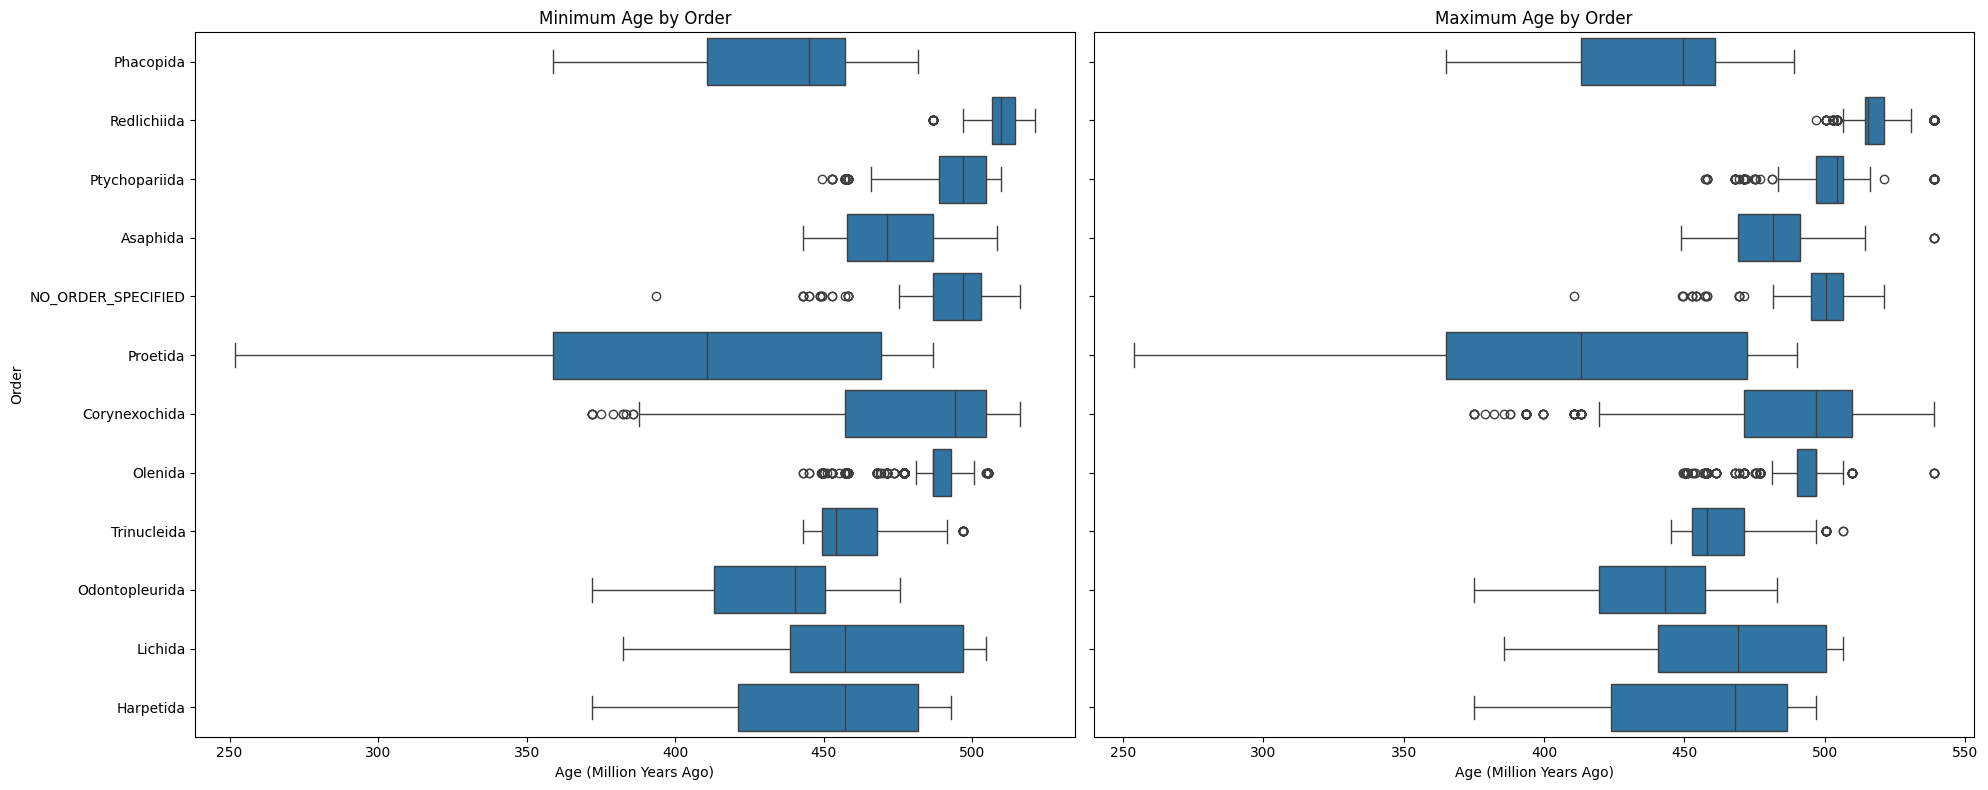

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

sns.boxplot(y='order', x='min_age_mya', data=train_df, ax=axes[0])
axes[0].set_title("Minimum Age by Order")

sns.boxplot(y='order', x='max_age_mya', data=train_df, ax=axes[1])
axes[1].set_title("Maximum Age by Order")

for ax in axes:
    ax.set_xlabel("Age (Million Years Ago)")
    ax.set_ylabel("Order")

plt.tight_layout()
plt.show()

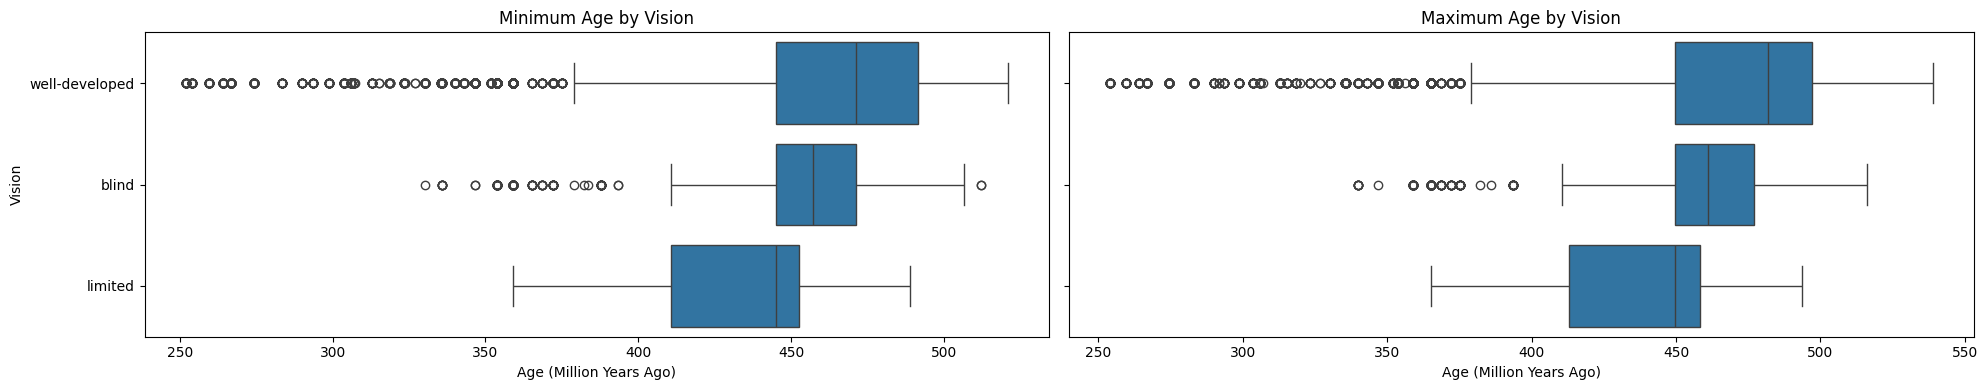

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 4), sharey=True)

sns.boxplot(y='vision', x='min_age_mya', data=train_df, ax=axes[0])
axes[0].set_title("Minimum Age by Vision")

sns.boxplot(y='vision', x='max_age_mya', data=train_df, ax=axes[1])
axes[1].set_title("Maximum Age by Vision")

for ax in axes:
    ax.set_xlabel("Age (Million Years Ago)")
    ax.set_ylabel("Vision")

plt.tight_layout()
plt.show()

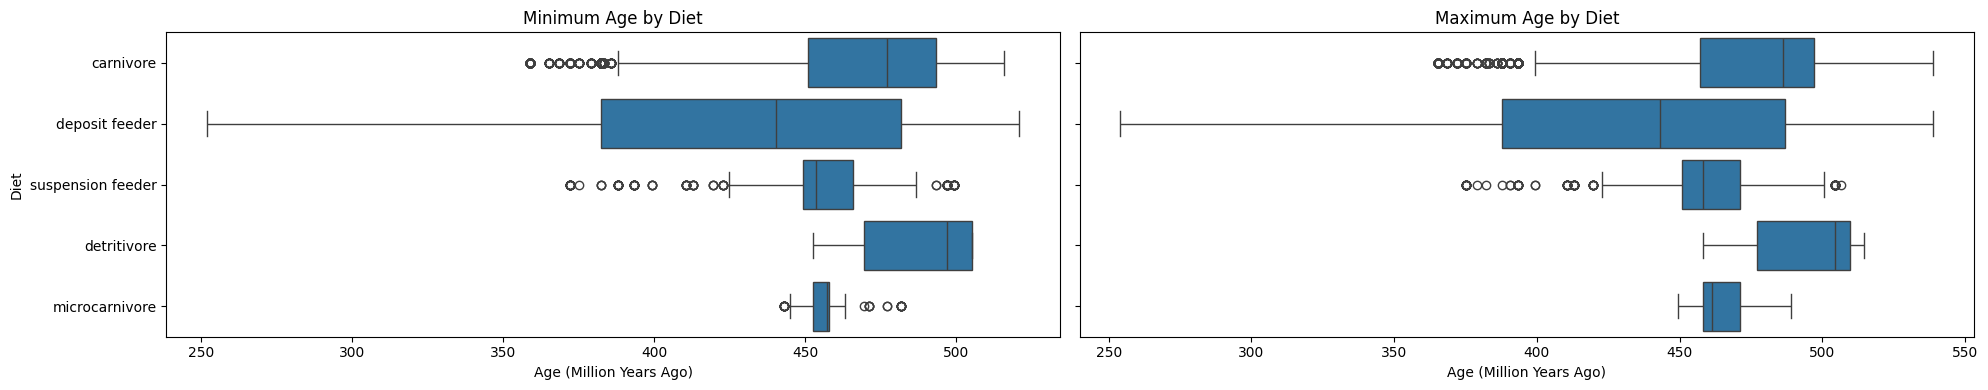

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 4), sharey=True)

sns.boxplot(y='diet', x='min_age_mya', data=train_df, ax=axes[0])
axes[0].set_title("Minimum Age by Diet")

sns.boxplot(y='diet', x='max_age_mya', data=train_df, ax=axes[1])
axes[1].set_title("Maximum Age by Diet")

for ax in axes:
    ax.set_xlabel("Age (Million Years Ago)")
    ax.set_ylabel("Diet")

plt.tight_layout()
plt.show()

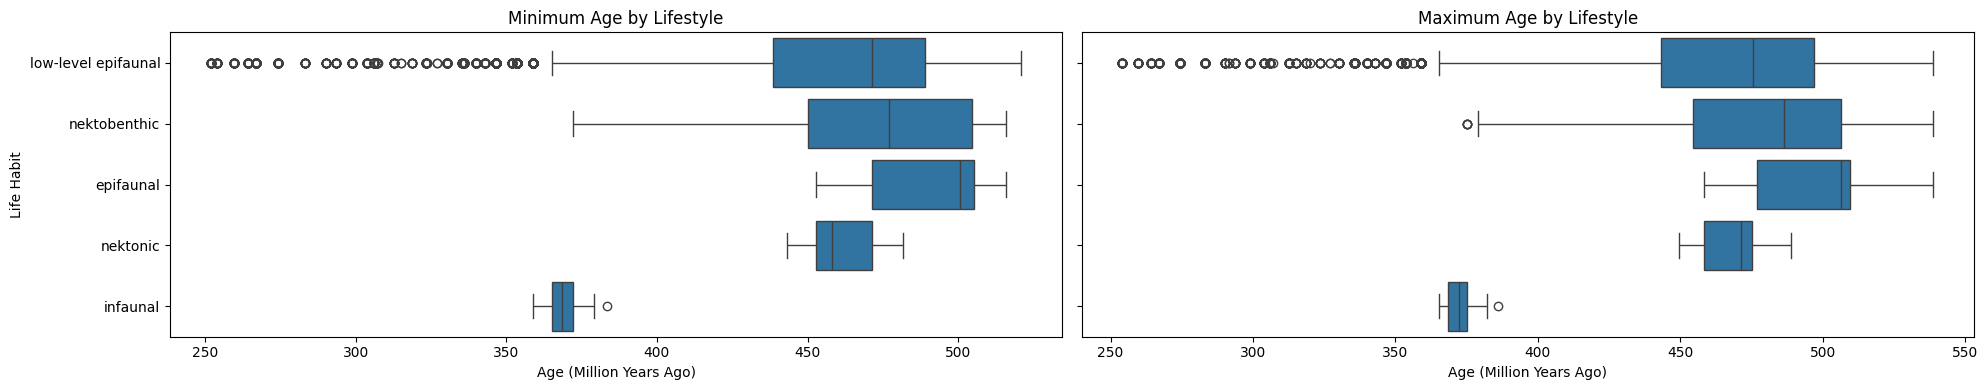

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 4), sharey=True)

sns.boxplot(y='life_habit', x='min_age_mya', data=train_df, ax=axes[0])
axes[0].set_title("Minimum Age by Lifestyle")

sns.boxplot(y='life_habit', x='max_age_mya', data=train_df, ax=axes[1])
axes[1].set_title("Maximum Age by Lifestyle")

for ax in axes:
    ax.set_xlabel("Age (Million Years Ago)")
    ax.set_ylabel("Life Habit")

plt.tight_layout()
plt.show()

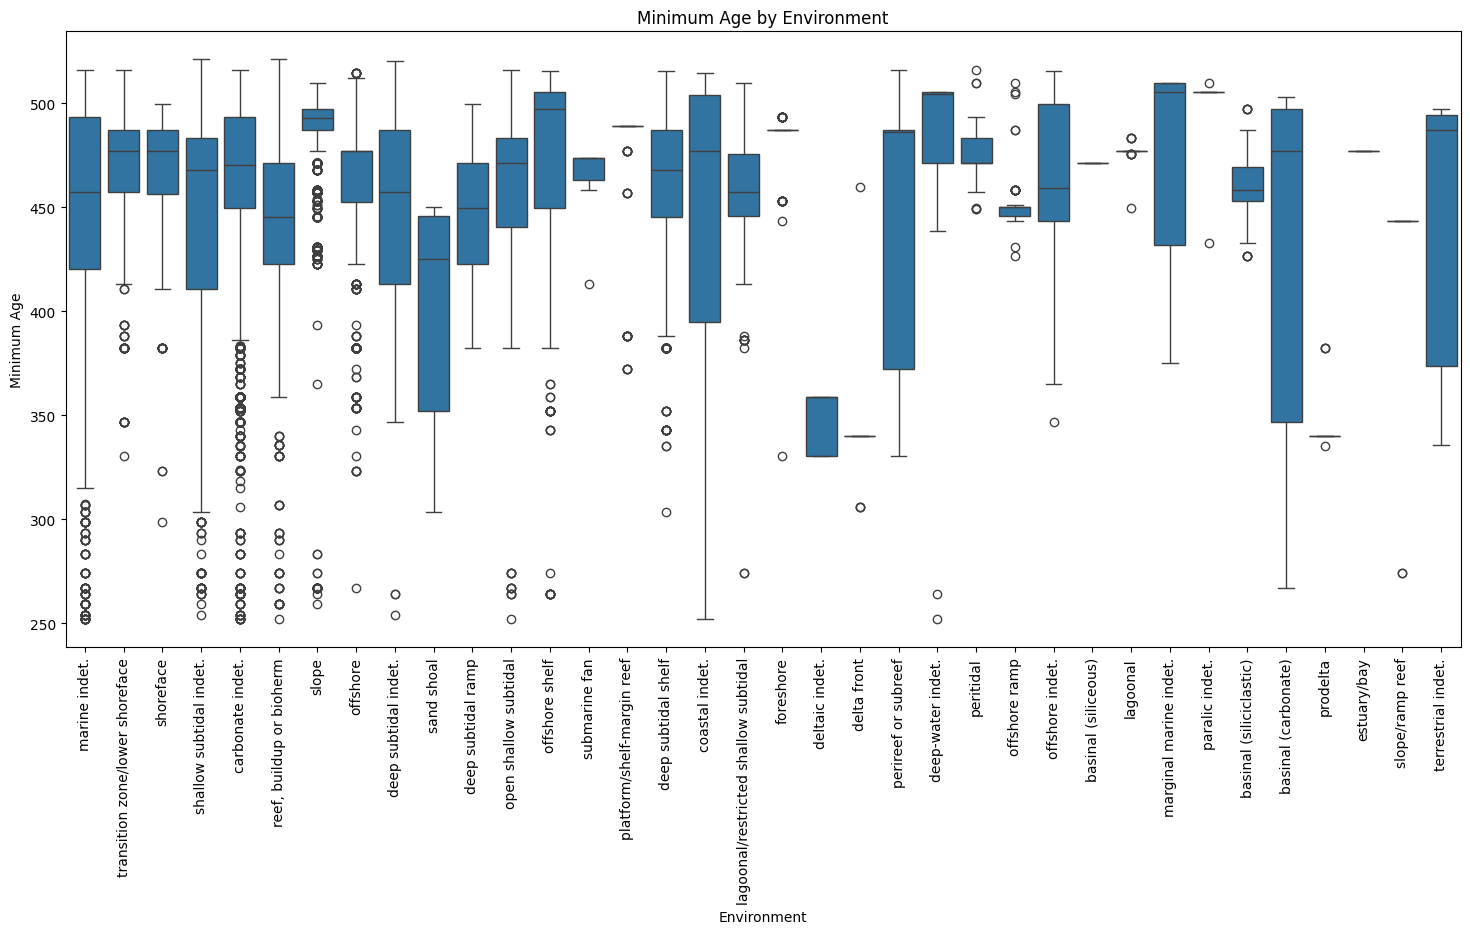

In [ ]:
plt.figure(figsize=(18, 8))
sns.boxplot(data=train_df, x='environment', y='min_age_mya')
plt.xticks(rotation=90)
plt.title("Minimum Age by Environment")
plt.ylabel("Minimum Age")
plt.xlabel("Environment")
plt.show()

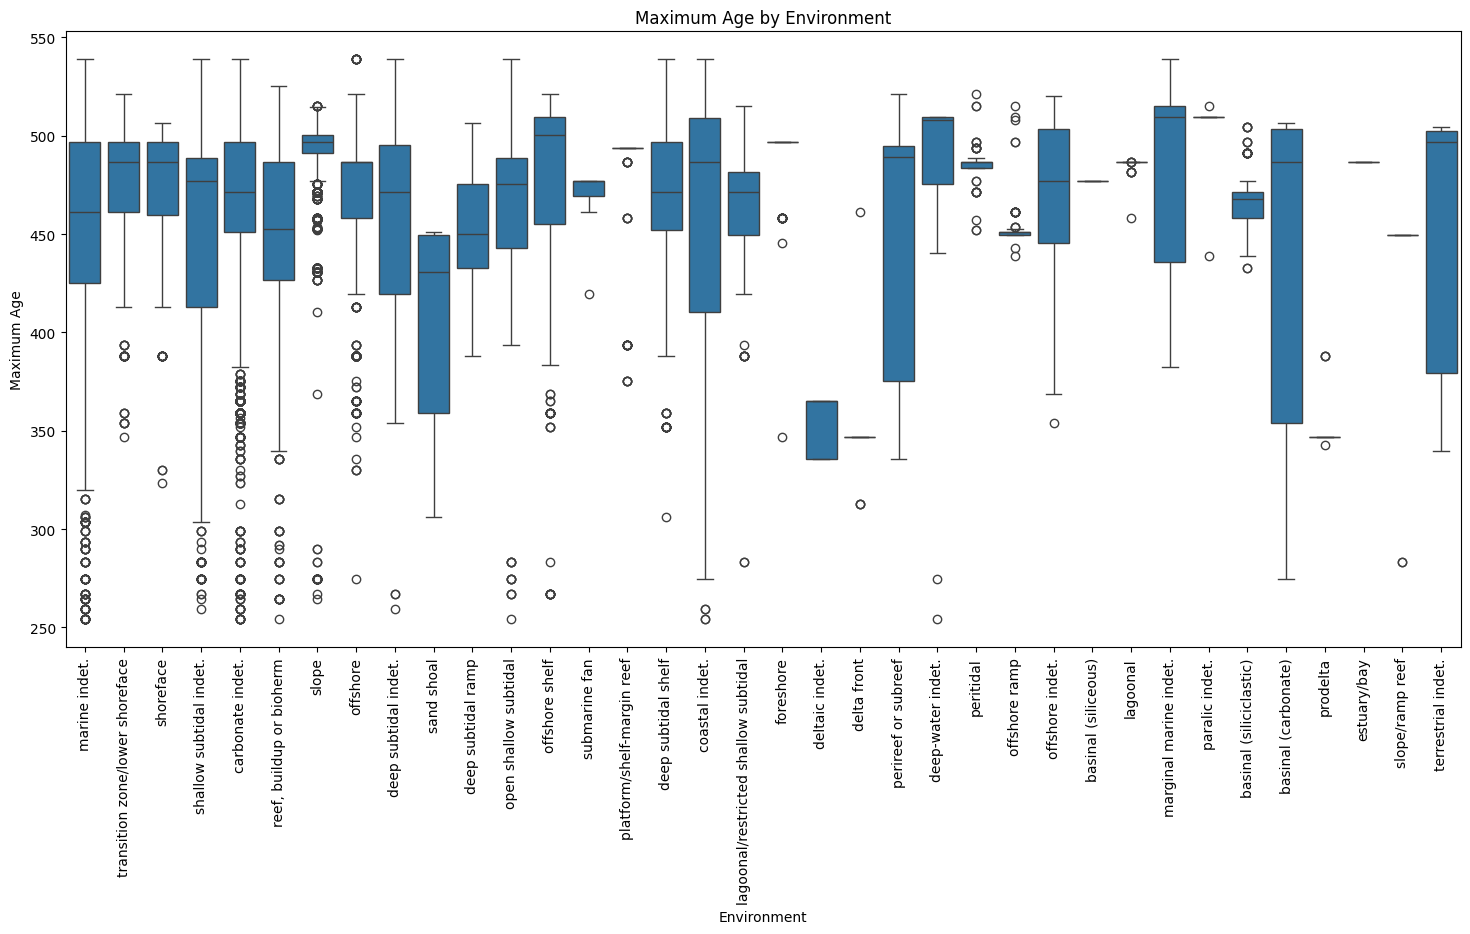

In [ ]:
plt.figure(figsize=(18, 8))
sns.boxplot(data=train_df, x='environment', y='max_age_mya')
plt.xticks(rotation=90)
plt.title("Maximum Age by Environment")
plt.ylabel("Maximum Age")
plt.xlabel("Environment")
plt.show()